In [463]:
import pandas as pd

# Import database from excel sheet. It is organized in columns [variable | unit | symbol | value]
# You can set index col (you can take symbol for cleaner formulas)
# df = pd.read_excel("../../database/ml_projekty.xlsx", sheet_name="Base", index_col="index", skiprows=1)

# to get value us df.at[<index>, "value"]

df8 = pd.read_excel("../../database/ml_projekty.xlsx", sheet_name="Base_pr8", index_col="index")
df8 = df8[17:36]
plane_prop= pd.read_csv("../../database/plane_properties.csv", index_col="Variable")
# display(df.head(10))
df8.columns

# plane_prop[""]


Index(['alpha', 'cz', 'c'x_p', 'a_p [deg]', 'Cmk', 'Cmp1', 'Cmp2', 'Cmp3',
       'Cmbu1', 'Cmbu2', 'Cmbu3'],
      dtype='object')

## Funkcje

In [464]:

def get_prop(variable:str)->float: 
    return float(plane_prop.at[variable, "Value"])

# delta_h [rad]
def delta_h(Cmbu, kappa, cz):
    a2 = get_prop("a2")
    a1 = get_prop("a1")
    a = get_prop("a")
    # a = 3.5
    deps_dalpha = get_prop("deps_dalpha")
    azh2 = get_prop("azh_2")
    
    mydict={
        "a1":a2,
        "a2":a1,
        "a":a,
        "deps_dalpha":deps_dalpha,
        "azh2":azh2,
    }
    
    # print(Cmbu, mydict)
    

    return Cmbu/(kappa*a2)-a1/a2*(cz/a*(1-deps_dalpha)+ azh2)

def get_cz(V:float)->float:
    
    mass=get_prop("mtow") - 50
    g = 9.81
    rho = 1.225
    S = get_prop("S")
    
    return mass*g/(1/2*rho*V**2*S)

In [465]:
deltas = ["delta_h1","delta_h2","delta_h3"]
kappas = ["kh_1","kh_2","kh_3"]
azhs = ["azh_1","azh_2","azh_3"]
cmbus = ["cmbu1","cmbu2","cmbu3"]
xc = []

## Liczenie delt i wykresy

In [466]:

for delta, kappa, cmbu in zip(deltas, kappas, cmbus):
    # print(get_prop(cmbu), get_prop(kappa))
    for i, row in df8.iterrows():
        # get_prop(cmbu), get_prop(kappa), get_prop(azh)
        # print(delta, kappa, azh, cmbu)
        df8.at[i, delta] = delta_h(get_prop(cmbu), get_prop(kappa),  df8.at[i, "cz"])

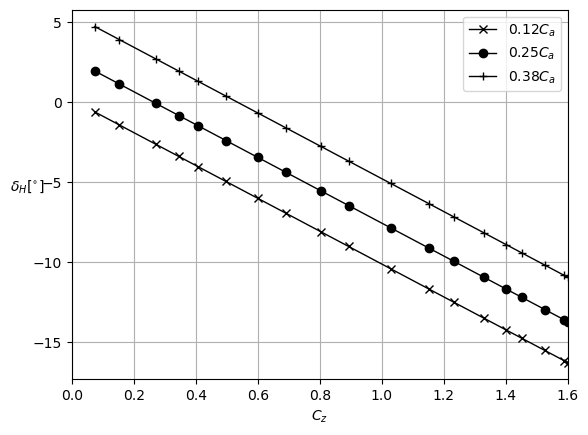

In [467]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.plot(df8['cz'], df8["delta_h1"]*180/3.14, label = "$0.12 C_a$",color = "black", marker = "x", linewidth = 1)
ax.plot(df8['cz'], df8["delta_h2"]*180/3.14, label = "$0.25 C_a$",color = "black", marker = "o", linewidth = 1)
ax.plot(df8['cz'], df8["delta_h3"]*180/3.14, label = "$0.38 C_a$",color = "black", marker = "+", linewidth = 1)

# ax.set_title()
ax.set_xlabel("$C_z$")
ax.set_ylabel("$\delta_H [^{\circ}]$", rotation = 0) 
ax.grid(True)
ax.legend()
ax.set_xlim([0, 1.6])

plt.savefig("../latex_raport/imgs/delta_h_cz.jpg", dpi=200)

$\delta_h (V)$  $,V \in (24, 54) ms^{-1}$


In [468]:
import numpy as np
# velocity range
vel_range = np.arange(24, 54, 1)
# cz range depending on velocity
cz_vel = [get_cz(v) for v in vel_range]

# delta_h values
delta_h_v = pd.DataFrame()
delta_h_v["vel"] = vel_range
delta_h_v["cz"] = cz_vel
# delta_h_v[""]


In [469]:

for delta, kappa, cmbu in zip(deltas, kappas, cmbus):
    # print(get_prop(cmbu), get_prop(kappa))
    for i, cz_val in enumerate(cz_vel):
        # get_prop(cmbu), get_prop(kappa), get_prop(azh)
        # print(delta, kappa, azh, cmbu)
        delta_h_v.at[i, delta] = delta_h(get_prop(cmbu), get_prop(kappa),  cz_val)

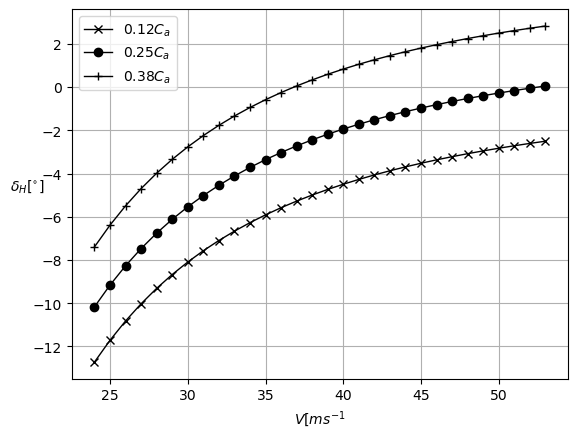

In [470]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.plot(delta_h_v["vel"], delta_h_v["delta_h1"]*180/3.14, label = "$0.12 C_a$",color = "black", marker = "x", linewidth = 1)
ax.plot(delta_h_v["vel"], delta_h_v["delta_h2"]*180/3.14, label = "$0.25 C_a$",color = "black", marker = "o", linewidth = 1)
ax.plot(delta_h_v["vel"], delta_h_v["delta_h3"]*180/3.14, label = "$0.38 C_a$",color = "black", marker = "+", linewidth = 1)

# ax.set_title()
ax.set_xlabel("$V[ms^{-1}$")
ax.set_ylabel("$\\delta_H [^{\\circ}]$", rotation = 0) 
ax.grid(True)
ax.legend()
# ax.set_xlim([0, 1.6])

plt.savefig("../latex_raport/imgs/delta_h_v.jpg", dpi = 200)

In [471]:
# f = open("../output/delta_h_v_table.txt", "w")
# delta_h_v_deg = delta_h_v
# delta_h_v_deg["delta_h1"] = delta_h_v["delta_h1"]*180/3.14
# delta_h_v_deg["delta_h2"] = delta_h_v["delta_h2"]*180/3.14
# delta_h_v_deg["delta_h3"] = delta_h_v["delta_h3"]*180/3.14

# delta_h_v_deg=delta_h_v_deg.round(3)
    
# delta_h_v_deg= delta_h_v_deg.set_index("vel")
# f.write(delta_h_v_deg.to_latex())
# f.close()

## Siła na drążku

In [472]:
def get_delta_kh(alpha_h, delta_h):
    b1 = get_prop("b1")
    b2 = get_prop("b2")
    b3 = get_prop("b3")
    
    return -b1/b3*alpha_h-b2/b3*delta_h

def get_cmzh(alpha_h, delta_h, delta_hk)->float:
    b1 = get_prop("b1")
    b2 = get_prop("b2")
    b3 = get_prop("b3")
    alpha_h, delta_h, delta_hk = round(float(alpha_h),3), round(float(delta_h),3), round(float(delta_hk),3)
    
    
    print('cmzh',b1,b2,b3)
    print("b1*alpha_h + b2*delta_h + b3*delta_hk")
    print(f"{b1}*{alpha_h} + {b2}*{delta_h} + {b3}*{delta_hk}")
    # print(f"{type(b1)}*{type(alpha_h)} + {type(b2)}*{type(delta_h)} + {type(b3)}*{type(delta_hk)}")
    
    
    return b1*alpha_h + b2*delta_h + b3*delta_hk

def pdh_func(v:float, cmzh:float):
    csh = get_prop("śr.c_sh")
    rho = 1.225
    ssh = get_prop("Ssh")
    ksd = get_prop("ksd")
    
    return 1/2*rho*ssh*csh*ksd*v**2*cmzh
    
    

In [473]:
# cz dla prękości ekonomicznej 34
v_H = get_prop("v_cruise")
cz_H = get_cz(v_H)


In [474]:
pdhs = ["pdh1","pdh2","pdh3"]

# print(delta_h_v.dtypes)

for pdh in pdhs:
    for i, row in delta_h_v.iterrows():
        
        
        key = f'delta_h{pdh.replace("pdh", "")}'
        
        
        delta_h = row[key]
    
        
        delta_kh = get_delta_kh(
            get_prop("azh_2"),
            delta_h    
        )
        
    
        cmzh = get_cmzh(
            get_prop("azh_2"),
            delta_h,
            delta_kh
        )
        # print(delta_kh, cmzh)
        
        
        delta_h_v.at[i, pdh] = pdh_func(row['vel'], cmzh)

cmzh -0.906 -0.154 -0.569
b1*alpha_h + b2*delta_h + b3*delta_hk
-0.906*-0.073 + -0.154*-0.222 + -0.569*0.176
cmzh -0.906 -0.154 -0.569
b1*alpha_h + b2*delta_h + b3*delta_hk
-0.906*-0.073 + -0.154*-0.204 + -0.569*0.171
cmzh -0.906 -0.154 -0.569
b1*alpha_h + b2*delta_h + b3*delta_hk
-0.906*-0.073 + -0.154*-0.189 + -0.569*0.167
cmzh -0.906 -0.154 -0.569
b1*alpha_h + b2*delta_h + b3*delta_hk
-0.906*-0.073 + -0.154*-0.175 + -0.569*0.163
cmzh -0.906 -0.154 -0.569
b1*alpha_h + b2*delta_h + b3*delta_hk
-0.906*-0.073 + -0.154*-0.162 + -0.569*0.16
cmzh -0.906 -0.154 -0.569
b1*alpha_h + b2*delta_h + b3*delta_hk
-0.906*-0.073 + -0.154*-0.151 + -0.569*0.157
cmzh -0.906 -0.154 -0.569
b1*alpha_h + b2*delta_h + b3*delta_hk
-0.906*-0.073 + -0.154*-0.141 + -0.569*0.154
cmzh -0.906 -0.154 -0.569
b1*alpha_h + b2*delta_h + b3*delta_hk
-0.906*-0.073 + -0.154*-0.132 + -0.569*0.151
cmzh -0.906 -0.154 -0.569
b1*alpha_h + b2*delta_h + b3*delta_hk
-0.906*-0.073 + -0.154*-0.124 + -0.569*0.149
cmzh -0.906 -0.154 -

In [475]:
delta_h_v


,vel,cz,delta_h1,delta_h2,delta_h3,pdh1,pdh2,pdh3
0,24,1.253129,-0.221900,-0.177344,-0.128947,0.013554,0.005958,0.006330
1,25,1.154884,-0.204320,-0.159764,-0.111366,0.020605,0.024807,0.012767
2,26,1.067755,-0.188728,-0.144172,-0.095775,0.019315,0.010401,0.010838
3,27,0.990127,-0.174837,-0.130281,-0.081884,0.032140,0.022526,0.022997
4,28,0.920666,-0.162408,-0.117851,-0.069454,0.004663,0.009934,0.052506
5,29,0.858267,-0.151241,-0.106685,-0.058288,0.006415,0.073938,0.057737
6,30,0.802003,-0.141173,-0.096617,-0.048220,0.026297,0.032348,0.015010
7,31,0.751095,-0.132064,-0.087507,-0.039110,0.067963,0.074424,0.055911
8,32,0.704885,-0.123795,-0.079238,-0.030841,0.059974,0.046470,0.047132
9,33,0.662812,-0.116266,-0.071710,-0.023312,0.050546,0.057867,0.036888


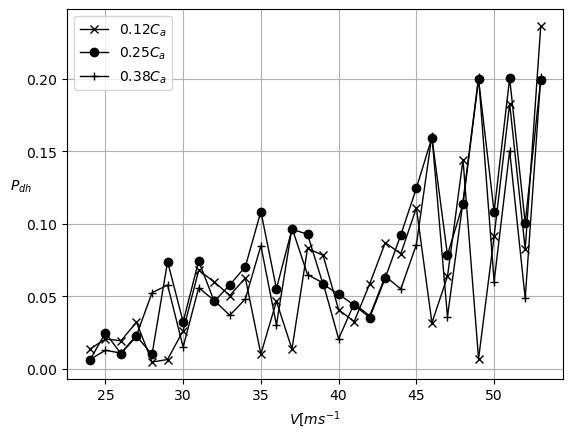

In [476]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

# ["pdh1","pdh2","pdh3"]

ax.plot(delta_h_v["vel"], delta_h_v["pdh1"], label = "$0.12 C_a$",color = "black", marker = "x", linewidth = 1)
ax.plot(delta_h_v["vel"], delta_h_v["pdh2"], label = "$0.25 C_a$",color = "black", marker = "o", linewidth = 1)
ax.plot(delta_h_v["vel"], delta_h_v["pdh3"], label = "$0.38 C_a$",color = "black", marker = "+", linewidth = 1)

# ax.set_title()
ax.set_xlabel("$V[ms^{-1}$")
ax.set_ylabel("$P_{dh}$", rotation = 0) 
ax.grid(True)
ax.legend()
# ax.set_xlim([0, 1.6])

plt.savefig("../latex_raport/imgs/pdh.jpg", dpi = 200)